In [1]:
import numpy as np
import pandas as pd
from scipy.io import loadmat
import glob
import os
import sys
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white")

from scipy import stats
from mne.viz import circular_layout, plot_connectivity_circle
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.multicomp
import pyreadstat

from matplotlib import cm
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)

from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from statannot import add_stat_annotation
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt

D:\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
top_dir = 'H:\\Jupyter\\Stroke15\\Multilayer_stroke15\\Results\\02-multilayer'
parcellations = np.asarray([['network32', 'Network32', 32],
                            ['power', 'Power', 264], 
                            ['schaefer', 'Schaefer', 300]])
data_path = top_dir+'\\'+ parcellations[0][0]+'\\' + parcellations[0][0]

In [5]:
f"{data_path}_recruitment_tr50.csv"

'H:\\Jupyter\\Stroke15\\Multilayer_stroke15\\Results\\02-multilayer\\network32\\network32_recruitment_tr50.csv'

# 01-recruitment stat

In [8]:
recruitment = pd.read_csv(f"{data_path}_recruitment_tr50.csv")
recruitment

,Subject,Group,Network,Recruitment
0,0,Mild,DMN,0.949928
1,0,Mild,SMN,0.919464
2,0,Mild,VIS,1.220802
3,0,Mild,SAN,0.936559
4,0,Mild,DAN,0.922099
...,...,...,...,...
235,29,Control,SAN,1.589491
236,29,Control,DAN,1.652477
237,29,Control,FPN,1.516651
238,29,Control,LN,1.338595


In [9]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
model = ols('Recruitment ~ C(Group)', data=recruitment).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(Group),2.541874,2.0,15.298757,5.637065e-07
Residual,19.688666,237.0,NaN,NaN


In [1]:
# plt.figure(figsize=(20, 6))
# # sns.set_style("ticks")

# ax = sns.stripplot(x="Network",
#                    y="Recruitment",
#                 hue="Group", 
# #               color="whitesmoke", 
# #               jitter=True,
#               palette=['#ff9966','#ffff99','#ccccff'],
# #             palette=["silver", "salmon", "darkred"],
# #               palette="Set3",
#               dodge=True,
# #               split=True,
# #               legend =False,
#               data = recruitment,
#                    size = 10,
#               edgecolor = 'k',
#               linewidth = 1.5,
#               alpha =0.7
#              )
# sns.boxplot(x="Network", y="Recruitment",
#             hue="Group",
# #             capsize=.1,
#             #estimator= np.mean,
#             #ci="sd",
#             #errcolor="k",
#             palette=['#ff9966','#ffff99','#ccccff'],
# #             palette='Set3',
#             #hue="Patient_status", kind="bar",  
# #             palette=["silver", "salmon", "darkred"],
#             #palette="Set2",
# #             width = 0.8,
#             saturation = 0.6,
#             data = recruitment)

# sns.despine(offset=10, trim=True)
# handles, labels = ax.get_legend_handles_labels()

# # When creating the legend, only use the first two elements
# # to effectively remove the last two.
# l = plt.legend(handles[0:3], labels[0:3], bbox_to_anchor=(0.85, 0.95), loc= 1, borderaxespad=0.)

# # pairs= [
# #     (("DMN","Stroke"),("DMN","Control")),\
# #     (("SMN","Stroke"),("SMN","Control")),\
# #     (("VIS","Stroke"),("VIS","Control")),\
# #     (("SAN","Stroke"),("SAN","Control")),\
# #     (("DAN","Stroke"),("DAN","Control")),\
# #     (("FPN","Stroke"),("FPN","Control")),\
# #     (("LN","Stroke"),("LN","Control")),\
# #     (("CE","Stroke"),("CE","Control")),\
# #     ]
# # test = ttest_ind(permutations=5000)
# add_stat_annotation(ax,
# #                     box_pairs = pairs,
#                     data =  recruitment,
#                     test='t-test_ind',
# #                     perform_stat_test=False, 
# #                     pvalues=[4.489e-02,2.902e-02,4.251e-02],
#                     line_offset_to_box = 0.08, line_offset = 0.01, line_height = 0.01, text_offset=0.08,
#                     loc='inside', x="Network", y= "Recruitment", hue ='Group',verbose=2)
# # plt.savefig('recruitment_Bonferroni_corrected.png', dpi = 300, bbox_inches='tight')

# 02- recruitment and integratation stat

In [14]:
recru_inte_df = pd.read_csv(f'{data_path}_between_net_mean_alle_tidy_corrected_tr_50.csv')

In [30]:
recru_inte_df

,Unnamed: 0,Subject,Group,Bet_nets,Mean_alleg
0,0,0,Mild,0,0.949928
1,0,0,Mild,1,0.845925
2,0,0,Mild,2,1.259319
3,0,0,Mild,3,1.000949
4,0,0,Mild,4,0.945484
...,...,...,...,...,...
1075,0,29,Control,56,1.729899
1076,0,29,Control,57,1.568657
1077,0,29,Control,66,1.338595
1078,0,29,Control,67,1.271008


In [31]:
# print(recru_inte_df)
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import pandas as pd
import numpy as np
import json
import os

from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from matplotlib import cm
from numpy.ma import masked_array
from statsmodels.stats.multitest import multipletests
from scipy.stats import pearsonr
from functools import reduce

from bioinfokit.analys import stat
# ~~~~~~~~~~~~ define the stat model~~~~~~~~~~~~~~~~~~~
import scipy.stats as stats
# stats f_oneway functions takes the groups as input and returns ANOVA F and p value
# fvalue, pvalue = stats.f_oneway(df['A'], df['B'], df['C'], df['D'])
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
recru_inter_groupbyfactor = recru_inte_df.groupby('Bet_nets')
# # inter_2test_df = Pd.DataFrame()
# recru_inter_2test_df ={}
# recru_inter_2test_df['Bet_Nets'] =[]
# recru_inter_2test_df['stat'] =[]
# recru_inter_2test_df['pval'] =[]
recru_inter_ftest_df ={}
recru_inter_ftest_df['Bet_Nets'] =[]
recru_inter_ftest_df['fval'] =[]
recru_inter_ftest_df['pval'] =[]

recru_inter_post_2test_df ={}
recru_inter_post_2test_df ['sig_bet_nets'] =[]
recru_inter_post_2test_df ['mild2severe_stat'] =[]
recru_inter_post_2test_df ['mild2severe_pval'] =[]
recru_inter_post_2test_df ['severe2control_stat'] =[]
recru_inter_post_2test_df ['severe2control_pval'] =[]
recru_inter_post_2test_df ['mild2control_stat'] =[]
recru_inter_post_2test_df ['mild2control_pval'] =[]


for factor, group in recru_inter_groupbyfactor:
#     print(factor)
#     print(group)
#     break
# #     temp_recru__inte = group['Mean_alleg'].values
#     recru_inter_2test_df['Bet_Nets'].append(factor)
#     print( temp_recru__inte)
#     break
    mild = group[group['Group']=='Mild']
    severe = group[group['Group']=='Severe']
    control = group[group['Group']=='Control']
#     print(control)
#     break
    fvalue, pvalue = stats.f_oneway(mild['Mean_alleg'],severe['Mean_alleg'],control['Mean_alleg'])
    print(fvalue, pvalue)
    recru_inter_ftest_df['fval'].append(fvalue)
    recru_inter_ftest_df['pval'].append(pvalue)
    if pvalue < 0.05:
        recru_inter_post_2test_df ['sig_bet_nets'].append(factor)
        
        mild_severe = pd.concat( (mild,severe),axis = 0)
        severe_control = pd.concat( (severe,control),axis = 0)
        mild_control = pd.concat( (mild,control),axis = 0)
        s1 = stat()
        s1.ttest(df = mild_severe, xfac = "Group",res = "Mean_alleg",test_type=2)
        t1 = s1.summary.split('/n')[0].split('\n')[5].split(' ')[-1]
        p1 =  s1.summary.split('/n')[0].split('\n')[9].split(' ')[-1]
        
#         print(t1,p1)
#         print(s1.summary)
#         break
        s2 = stat()
        s2.ttest(df = severe_control, xfac = "Group",res = "Mean_alleg",test_type=2)
        t2 = s2.summary.split('/n')[0].split('\n')[5].split(' ')[-1]
        p2 =  s2.summary.split('/n')[0].split('\n')[9].split(' ')[-1]
        
        s3 = stat()
        s3.ttest(df = mild_control, xfac = "Group",res = "Mean_alleg",test_type=2)
        t3 = s3.summary.split('/n')[0].split('\n')[5].split(' ')[-1]
        p3 =  s3.summary.split('/n')[0].split('\n')[9].split(' ')[-1]
        
        recru_inter_post_2test_df ['mild2severe_stat'].append(float(t1))
        recru_inter_post_2test_df ['mild2severe_pval'].append(float(p1))
        recru_inter_post_2test_df ['severe2control_stat'].append(float(t2))
        recru_inter_post_2test_df ['severe2control_pval'].append(float(p2))
        recru_inter_post_2test_df ['mild2control_stat'].append(float(t3))
        recru_inter_post_2test_df ['mild2control_pval'].append(float(p3))


0.0135975272906084 0.9865012523760273
0.7363731775798377 0.4882187626593514
0.699419330725816 0.5056534566128172
3.2712000474037257 0.05344289733605619
0.5098691505961359 0.6062417018628437
0.008590620688727993 0.9914488820189639
0.5279939165234272 0.5957522550682728
4.549643357691098 0.019823458941036057
5.235906458740087 0.011978358222927057
0.4488170430784141 0.6430596681510246
1.2575760164504808 0.30047129156356905
1.7043337062743318 0.20088433398902472
0.3394822980520725 0.7151349014143649
0.3593991515394511 0.7013849436878425
3.6656793783470842 0.039046527953494656


8.904885924526303 0.0010712206224565291
0.25489454746639084 0.7768421731483628
0.022404772097800316 0.9778625106186258
2.2235797335246894 0.12766198889116565
4.187864426942591 0.026054813182490155
2.23341622801434 0.12658870045939896
12.059239282427198 0.00018097096544945364
0.7601175477506309 0.47735772036297763
1.638442304141994 0.21301481524559027
0.32557112364822643 0.7249103241611384
0.10888915915585712 0.897221

[[1.35975273e-02 7.36373178e-01 6.99419331e-01 3.27120005e+00
  5.09869151e-01 8.59062069e-03 5.27993917e-01 4.54964336e+00]
 [7.36373178e-01 5.23590646e+00 4.48817043e-01 1.25757602e+00
  1.70433371e+00 3.39482298e-01 3.59399152e-01 3.66567938e+00]
 [6.99419331e-01 4.48817043e-01 8.90488592e+00 2.54894547e-01
  2.24047721e-02 2.22357973e+00 4.18786443e+00 2.23341623e+00]
 [3.27120005e+00 1.25757602e+00 2.54894547e-01 1.20592393e+01
  7.60117548e-01 1.63844230e+00 3.25571124e-01 1.08889159e-01]
 [5.09869151e-01 1.70433371e+00 2.24047721e-02 7.60117548e-01
  2.66800920e+00 1.21690516e+00 2.72179563e+00 4.71941101e+00]
 [8.59062069e-03 3.39482298e-01 2.22357973e+00 1.63844230e+00
  1.21690516e+00 5.03658370e-01 2.02295095e+00 3.45725916e+00]
 [5.27993917e-01 3.59399152e-01 4.18786443e+00 3.25571124e-01
  2.72179563e+00 2.02295095e+00 4.66860882e+00 1.48909480e+00]
 [4.54964336e+00 3.66567938e+00 2.23341623e+00 1.08889159e-01
  4.71941101e+00 3.45725916e+00 1.48909480e+00 6.67342943e-01]]

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: UserWarning: matrix is already symmetric


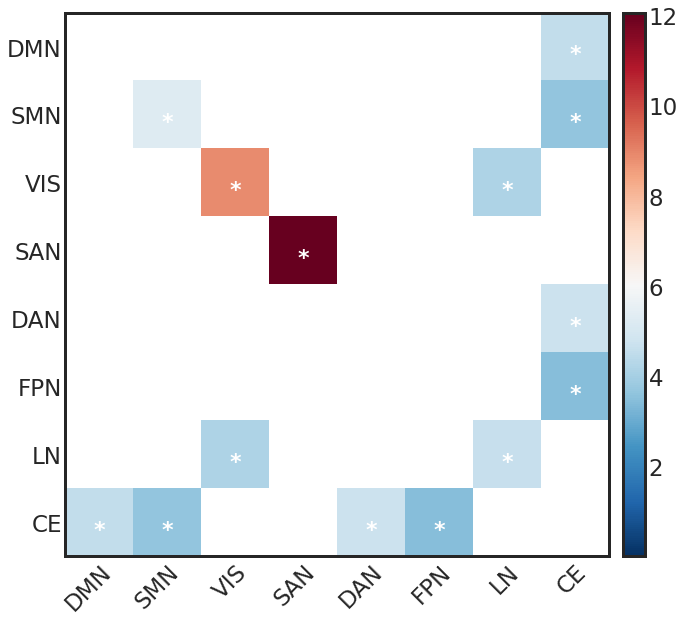

In [32]:
 ## plot Pf<0.05 sigificant different recruitment and intregation
recru_inter_ftest_t_m  = return_sys_matrix(recru_inter_ftest_df['fval'],n_net)
recru_inter_ftest_p_m  = return_sys_matrix(recru_inter_ftest_df['pval'],n_net)
print(recru_inter_ftest_t_m)

matrix_pval_plot(recru_inter_ftest_p_m, recru_inter_ftest_t_m, label_names,
                 recru_inter_ftest_t_m.min(), 
                 recru_inter_ftest_t_m.max(), 
#                  outpath= f'{data_path}_recru_inte_signif.png'
                )

In [173]:
f'{data_path}_recru_inte_signif.png'

'H:\\Jupyter\\Stroke15\\Multilayer_stroke15\\Results\\02-multilayer\\network32\\network32_recru_inte_signif.png'

In [33]:
recru_inter_post_2test_df

{'sig_bet_nets': [7, 11, 17, 22, 26, 33, 47, 57, 66],
 'mild2severe_stat': [-0.0564671,
  1.31927,
  -0.525069,
  -0.870558,
  0.284544,
  2.17618,
  1.05541,
  0.753689,
  -0.481991],
 'mild2severe_pval': [0.955828,
  0.209843,
  0.608374,
  0.399786,
  0.780476,
  0.0485742,
  0.310456,
  0.464469,
  0.637826],
 'severe2control_stat': [2.65284,
  3.31877,
  -3.34529,
  2.90167,
  -2.21325,
  5.4943,
  -2.21786,
  2.89885,
  2.40524],
 'severe2control_pval': [0.0145339,
  0.00311996,
  0.00292935,
  0.00827357,
  0.0375578,
  1.60589e-05,
  0.0371991,
  0.00832734,
  0.0250127],
 'mild2control_stat': [2.32156,
  1.28105,
  -1.48994,
  4.97283,
  -2.20869,
  1.63364,
  -2.75748,
  1.26063,
  2.34207],
 'mild2control_pval': [0.0315257,
  0.215593,
  0.152654,
  8.44743e-05,
  0.0396796,
  0.118797,
  0.0125301,
  0.222703,
  0.0302222]}

In [22]:
label_names = ['DMN','SMN','VIS',"SAN",
          "DAN","FPN","LN","CE"]
n_net = len(label_names)
mild2severe_p_m  = np.ones((n_net,n_net))
mild2severe_t_m  = np.ones((n_net,n_net))

severe2control_p_m  = np.ones((n_net,n_net))
severe2control_t_m  = np.ones((n_net,n_net))

mild2control_p_m  = np.ones((n_net,n_net))
mild2control_t_m  = np.ones((n_net,n_net))

In [23]:
sig_roi = recru_inter_post_2test_df['sig_bet_nets']

mild2severe_stat = recru_inter_post_2test_df ['mild2severe_stat'] 
mild2severe_pval = recru_inter_post_2test_df ['mild2severe_pval'] 
severe2control_stat = recru_inter_post_2test_df ['severe2control_stat']
severe2control_pval = recru_inter_post_2test_df ['severe2control_pval']
mild2control_stat = recru_inter_post_2test_df ['mild2control_stat'] 
mild2control_pval = recru_inter_post_2test_df ['mild2control_pval']


for i,roi in enumerate(sig_roi):
    if len(str(roi)) == 1:
        row = 0
        col = roi
    else:
        row = int(str(roi)[0])
        col = int(str(roi)[1])
#     print(row,col,i)
    mild2severe_p_m[row][col] = mild2severe_pval[i]
    mild2severe_t_m[row][col]  = mild2severe_stat[i]
    mild2severe_p_m[col][row] = mild2severe_pval[i]
    mild2severe_t_m[col][row]  = mild2severe_stat[i]
    
    severe2control_p_m[row][col]  = severe2control_pval[i]
    severe2control_t_m[row][col]  = severe2control_stat[i]
    severe2control_p_m[col][row]  = severe2control_pval[i]
    severe2control_t_m[col][row]  = severe2control_stat[i]

    mild2control_p_m[row][col]  = mild2control_pval[i]
    mild2control_t_m[row][col]  = mild2control_stat[i]
    mild2control_p_m[col][row]  = mild2control_pval[i]
    mild2control_t_m[col][row]  = mild2control_stat[i]

In [2]:
def return_sys_matrix(vec,m_len):
    corrected_pval_matrix = np.zeros((m_len,m_len)) 
    k = 0
    for i in range(m_len):
        j = i
        while j< m_len:
#             print(i,j)
            corrected_pval_matrix[i][j] = vec[k]
            k = k+1
            j= j+1
    return corrected_pval_matrix + corrected_pval_matrix.T-np.diag(np.diag(corrected_pval_matrix))


def symmetrize(matrix):
    '''Symmetrizes triangular matrix'''
    from warnings import warn

    if np.allclose(matrix, matrix.T):
        warn('matrix is already symmetric')
        return matrix
    else:
        return matrix + matrix.T - np.diag(np.diag(matrix))

def matrix_pval_plot(pvals, cvals, labels, vmin, vmax, outpath = None, **savefig_kwargs):
    '''Creates matrix plot color coded according to underying p-values. 
    
    Args:
        pvals (array-like): 
            Symmetric matrix of p-values.
        cvals (array-like):
            Corresponding values. These values will actually determine color 
            intensity in heatmap cells.
        labels (list):
            List of labels for both matrix axis. Should have length equal to 
            pvals.shape[0].
        outpath (str)[optional]:
            If specified plot will be saved under path specified in outpath.
        savefig_kwargs (dict)[optional]:
            Optional kwargs passed to fig.savefig() function.
    '''
    # Correct p-values if needed
    pvals_corrected = pvals
    cvals_sig = np.ma.masked_array(symmetrize(cvals), symmetrize(pvals) > .05)

    fig, ax = plt.subplots(facecolor='w')

    # Manage labels
    ax.set_xticks(np.arange(len(labels)))
    ax.set_yticks(np.arange(len(labels)))
    ax.set_xticklabels(labels)
    ax.set_yticklabels(labels)
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Plot heatmaps
    clim = [-np.max(np.abs(cvals_sig)), np.max(np.abs(cvals_sig))]
    im_sig = ax.imshow(cvals_sig, cmap='RdBu_r', clim=clim, vmin = vmin, vmax = vmax)

    # Create colorbars
    cb_sig_axes = fig.add_axes(
        [ax.get_position().x1 + cbar_offset, ax.get_position().y0,
         cbar_width, ax.get_position().height])
    cb_sig = plt.colorbar(im_sig, cax=cb_sig_axes)

    # Annotate significant p-vals (FDR corrected)
    ind_corrected = np.nonzero((pvals_corrected < 0.05) * (pvals_corrected != 0))

    for i, j in zip(*ind_corrected):
        ax.text(j, i + .11, '*', ha="center", va="center", color="w", 
                fontsize=22, fontweight='bold')

    plt.plot()

    if outpath:
#         fig.savefig(outpath, **savefig_kwargs)
        fig.savefig(outpath,bbox_inches='tight', pad_inches=0, dpi=300)
# g.show()


In [4]:
# matrix_pval_plot(mild2control_p_m, mild2control_t_m, label_names, mild2control_t_m.min(), mild2control_t_m.max(), outpath= None)

In [3]:
# plt.style.use('seaborn-white')
# plt.rcParams['font.family'] = 'Helvetica'
# plt.rc('font', size=12)          # controls default text sizes
# plt.rc('axes', titlesize=30)     # fontsize of the axes title
# plt.rc('axes', labelsize=30)     # fontsize of the x and y labels
# plt.rc('xtick', labelsize=23)    # fontsize of the tick labels
# plt.rc('ytick', labelsize=23)    # fontsize of the tick labels
# plt.rc('legend', fontsize=15) 
# plt.rc('figure', figsize=(10, 10))
# plt.rc('axes', linewidth=3)

# # Colobar settings
# cbar_width = 0.03
# cbar_offset = 0.02

# # Create custom colormap (diverging black - white - black)
# col_gray = (.75, .75, .75)
# col_white = (1, 1, 1)
# newcmp = LinearSegmentedColormap.from_list(
#     'gray_div', 
#     [col_gray, col_white, col_gray], 
#     N=128)

# matrix_pval_plot(mild2severe_p_m, mild2severe_t_m, 
#                  label_names, mild2severe_t_m.min(), 
#                  mild2severe_t_m.max(), 
#                  outpath=  f'{data_path}_recru_inte_mild2severe_tr_50.png')
# matrix_pval_plot(severe2control_p_m, severe2control_t_m, 
#                  label_names, severe2control_t_m.min(), severe2control_t_m.max(),
#                  outpath= f'{data_path}_recru_inte_severe2control_tr_50.png')
# matrix_pval_plot(mild2control_p_m, mild2control_t_m, 
#                  label_names, mild2control_t_m.min(), mild2control_t_m.max(), 
#                  outpath= f'{data_path}_recru_inte_mild2control_tr_50.png'
#                 )